<a href="https://colab.research.google.com/github/ElizaLo/ML-with-Jupiter/blob/master/P8/ML_Practice_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
os.chdir("drive/My Drive/ML Practice/dogs_cats")

In [4]:
!ls

dogs_cats_small  dogs_cats_small_test


In [8]:
!pwd

/content/drive/My Drive/ML Practice/dogs_cats


In [7]:
#os.chdir("dogs_cats")

FileNotFoundError: ignored

In [9]:
import numpy as np
import keras
import cv2
import sys
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
train_dir = "dogs_cats_small"
test_dir = "dogs_cats_small_test"

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
ImSize = 64
input_shape = (ImSize, ImSize, 3)
batch_size = 32

In [0]:
train_datagen = ImageDataGenerator (rescale = 1.0 / 255,
                                   rotation_range = 10,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   fill_mode = "constant"
                                   )
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

In [46]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (ImSize, ImSize),
                                                   batch_size = batch_size)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (ImSize, ImSize),
                                                 batch_size = 1,
                                                 shuffle = False)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [47]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [48]:
print(train_generator.filenames)

['cats/cat.100.jpg', 'cats/cat.101.jpg', 'cats/cat.102.jpg', 'cats/cat.103.jpg', 'cats/cat.104.jpg', 'cats/cat.105.jpg', 'cats/cat.106.jpg', 'cats/cat.107.jpg', 'cats/cat.108.jpg', 'cats/cat.109.jpg', 'cats/cat.110.jpg', 'cats/cat.111.jpg', 'cats/cat.112.jpg', 'cats/cat.113.jpg', 'cats/cat.114.jpg', 'cats/cat.115.jpg', 'cats/cat.116.jpg', 'cats/cat.117.jpg', 'cats/cat.118.jpg', 'cats/cat.119.jpg', 'cats/cat.120.jpg', 'cats/cat.121.jpg', 'cats/cat.122.jpg', 'cats/cat.123.jpg', 'cats/cat.124.jpg', 'cats/cat.125.jpg', 'cats/cat.126.jpg', 'cats/cat.127.jpg', 'cats/cat.128.jpg', 'cats/cat.129.jpg', 'cats/cat.130.jpg', 'cats/cat.131.jpg', 'cats/cat.132.jpg', 'cats/cat.133.jpg', 'cats/cat.134.jpg', 'cats/cat.135.jpg', 'cats/cat.136.jpg', 'cats/cat.137.jpg', 'cats/cat.138.jpg', 'cats/cat.139.jpg', 'cats/cat.140.jpg', 'cats/cat.141.jpg', 'cats/cat.142.jpg', 'cats/cat.143.jpg', 'cats/cat.144.jpg', 'cats/cat.145.jpg', 'cats/cat.146.jpg', 'cats/cat.147.jpg', 'cats/cat.148.jpg', 'cats/cat.149.jpg',

In [49]:
print(train_generator.classes)

[0 0 0 ... 1 1 1]


In [0]:
from keras.layers  import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

In [0]:
model = keras.models.Sequential()
model.add(Conv2D(64, (3,3), padding = "same", activation = 'relu', 
                 input_shape = input_shape))
model.add(MaxPool2D())
model.add(Conv2D(128, (3,3), padding = "same", activation = 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(256, (3,3), padding = "same", activation = 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(512, (3,3), padding = "same", activation = 'relu'))
model.add(MaxPool2D((8,8)))
model.add(Flatten())
model.add(Dense(2, activation = 'softmax'))

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 512)         1180160   
__________

In [0]:
model.compile(keras.optimizers.Adam(),
             loss = keras.losses.categorical_crossentropy,
             metrics = ['accuracy'])

In [54]:
model.fit_generator(train_generator, 
                    steps_per_epoch = train_generator.n // batch_size,
                   epochs = 30)

Epoch 1/30
56/56 [==============================] - 11s 205ms/step - loss: 0.6954 - acc: 0.5050
Epoch 2/30
56/56 [==============================] - 12s 209ms/step - loss: 0.6934 - acc: 0.5045
Epoch 3/30
56/56 [==============================] - 12s 211ms/step - loss: 0.6933 - acc: 0.5027
Epoch 4/30
56/56 [==============================] - 13s 230ms/step - loss: 0.6933 - acc: 0.4933
Epoch 5/30
56/56 [==============================] - 12s 207ms/step - loss: 0.6933 - acc: 0.5088
Epoch 6/30
56/56 [==============================] - 12s 205ms/step - loss: 0.6933 - acc: 0.4983
Epoch 7/30
56/56 [==============================] - 11s 203ms/step - loss: 0.6933 - acc: 0.4950
Epoch 8/30
56/56 [==============================] - 11s 205ms/step - loss: 0.6932 - acc: 0.5005
Epoch 9/30
56/56 [==============================] - 11s 204ms/step - loss: 0.6932 - acc: 0.4899
Epoch 10/30
56/56 [==============================] - 12s 207ms/step - loss: 0.6935 - acc: 0.5211
Epoch 11/30
56/56 [====================

In [0]:
score = model.evaluate_generator(test_generator, steps = test_generator.n)

In [56]:
print(score)

[0.6004727206379176, 0.66]


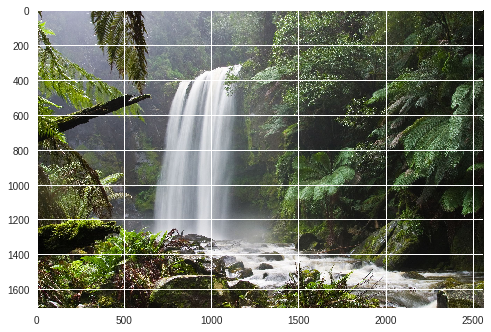

In [32]:
image = plt.imread("Hopetoun_falls.jpg")
plt.imshow(image)
plt.show()

In [0]:
nature_datagen = ImageDataGenerator(shear_range = 0.2,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   fill_mode = "constant")

In [34]:
img.shape

(1707, 2560, 3)

In [0]:
nature_gen = nature_datagen.flow(img.reshape((1,) + image.shape), batch_size = 1)

In [0]:
img_new = nature_gen.next()

In [43]:
img.shape

(1707, 2560, 3)

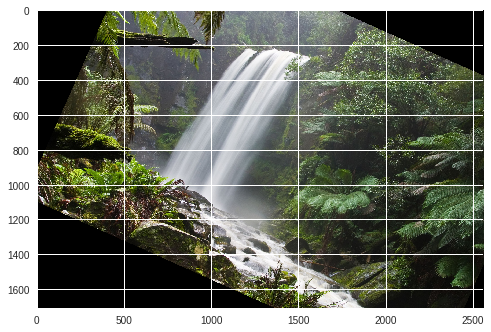

In [44]:
plt.imshow(img_new[0]/255)
plt.show()


In [0]:
id_to_label = {label: label for (label, class_id ) in train_generator.class_indices.items()}

In [0]:
cap = cv2.VideoCapture(0)

try:
  while(True):
    ret, frame = cap.read()
    if (not ret):
      break
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_rgb = cv2.resize(image_rgb, (ImSize, ImSize))
    image_rgb = cv2.rgb.reshape((1,)+ image_rgb.shape) / 255
    probs = model.predict(image_rgb)
    print(probs.shape)
    class_id = np.argmax(probs)
    print(class_id)
    class_label = id_to_label[class_id]
    print(class_label)
    cv2.putText(frame, str(class_label) + ": " + 
                str(probs[0][class_id]), (100, 100), 
                cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0))
    
    cv2.imshow("frame",frame)
    if(cv2.waitKey(1) == ord('q')):
      break
except Exception as e:
  print(e)
  
cap.release()
cv2.destroyAllWindows()

In [0]:
model.save("model_cats_dogs")

In [0]:
model.load_weights("model_cats_dogs")